In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/combined_zpallagi.csv")
df.head(10)

,id,year,State,new_agi_stub,Returns,Single,Joint,Hd_of_Hshld,AGI_Amt,Total_Inc_Returns,Total_Inc_Amt,Std_Ded_Charity_Returns,Std_Ded_Charity_Amt,Std_Ded_Returns,Std_Ded_Amt,Itemized_Ded_Returns,Itemized_Ded_Amt,Charitable_Returns,Charitable_Amt
0,0,2012,AL,1.0,889920.0,490850.0,129070.0,256900.0,11517112.0,NaN,NaN,NaN,NaN,NaN,NaN,62120.0,850798.0,46490.0,121095.0
1,1,2012,AL,2.0,491150.0,194370.0,159200.0,123350.0,17617800.0,NaN,NaN,NaN,NaN,NaN,NaN,129230.0,1914481.0,103450.0,358997.0
2,2,2012,AL,3.0,254280.0,68160.0,148960.0,31480.0,15644666.0,NaN,NaN,NaN,NaN,NaN,NaN,112550.0,1914831.0,96530.0,404644.0
3,3,2012,AL,4.0,160160.0,23020.0,126140.0,9030.0,13885434.0,NaN,NaN,NaN,NaN,NaN,NaN,91800.0,1770415.0,81870.0,406140.0
4,4,2012,AL,5.0,183320.0,15880.0,161260.0,4890.0,24641055.0,NaN,NaN,NaN,NaN,NaN,NaN,141580.0,3383365.0,131170.0,849342.0
5,5,2012,AL,6.0,44840.0,3420.0,40370.0,750.0,21926706.0,NaN,NaN,NaN,NaN,NaN,NaN,42720.0,2570907.0,40870.0,824648.0
6,6,2012,AK,1.0,128930.0,98750.0,13120.0,13880.0,1482918.0,NaN,NaN,NaN,NaN,NaN,NaN,4740.0,70709.0,2460.0,4791.0
7,7,2012,AK,2.0,80860.0,44370.0,20740.0,12860.0,2951291.0,NaN,NaN,NaN,NaN,NaN,NaN,11230.0,169387.0,6650.0,17280.0
8,8,2012,AK,3.0,51160.0,21860.0,22000.0,5840.0,3155691.0,NaN,NaN,NaN,NaN,NaN,NaN,16040.0,256775.0,10370.0,31973.0
9,9,2012,AK,4.0,35010.0,9740.0,22250.0,2460.0,3038502.0,NaN,NaN,NaN,NaN,NaN,NaN,15280.0,281076.0,10610.0,39831.0


# Rate of Tax Return Filing Status

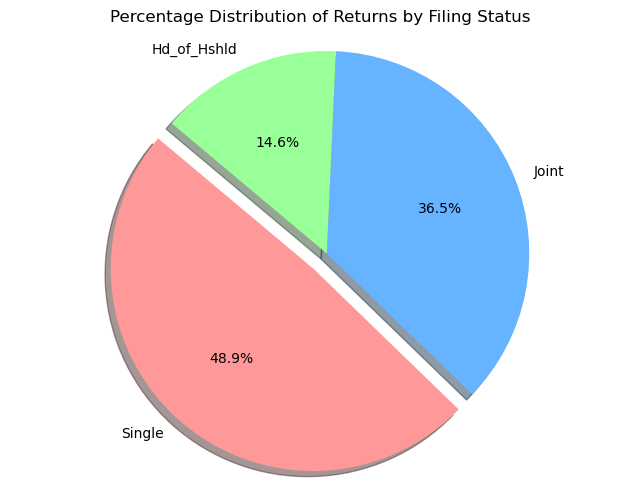

In [4]:
returns_sum = df.loc[:, 'Returns'].sum()
single_sum = df.loc[:, 'Single'].sum()
joint_sum = df.loc[:, 'Joint'].sum()
hd_of_Hshld_sum = df.loc[:, 'Hd_of_Hshld'].sum()

single_percentage = (single_sum / returns_sum) * 100
joint_percentage = (joint_sum / returns_sum) * 100
hd_of_hshld_percentage = (hd_of_Hshld_sum / returns_sum) * 100

labels = ['Single', 'Joint', 'Hd_of_Hshld']
sizes = [single_percentage, joint_percentage, hd_of_hshld_percentage]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Percentage Distribution of Returns by Filing Status')
plt.show()

# Rate of Tax Returns with Itemized Deduction vs Standard Deduction

In [5]:
filtered_data = pd.read_csv('Data/combined_zpallagi.csv')
filtered_data['year'] = filtered_data['year'].astype(int)

state_year_itemized_aggregated_adjusted = filtered_data.groupby(['State', 'year']).agg({
    'Itemized_Ded_Returns': 'sum',
    'Returns': 'sum'
}).reset_index()

state_year_itemized_aggregated_adjusted['Itemized_Ded_to_Returns_Percent'] = (
    state_year_itemized_aggregated_adjusted['Returns'] / state_year_itemized_aggregated_adjusted['Itemized_Ded_Returns']
)

state_year_itemized_aggregated_adjusted

,State,year,Itemized_Ded_Returns,Returns,Itemized_Ded_to_Returns_Percent
0,AK,2012,87510.0,358990.0,4.102274
1,AK,2013,82370.0,355150.0,4.311643
2,AK,2014,79760.0,357640.0,4.483952
3,AK,2015,80270.0,358650.0,4.468045
4,AK,2016,79280.0,344240.0,4.342079
...,...,...,...,...,...
505,WY,2017,59570.0,266070.0,4.466510
506,WY,2018,16700.0,268140.0,16.056287
507,WY,2019,16590.0,274980.0,16.575045
508,WY,2020,14470.0,276680.0,19.120940


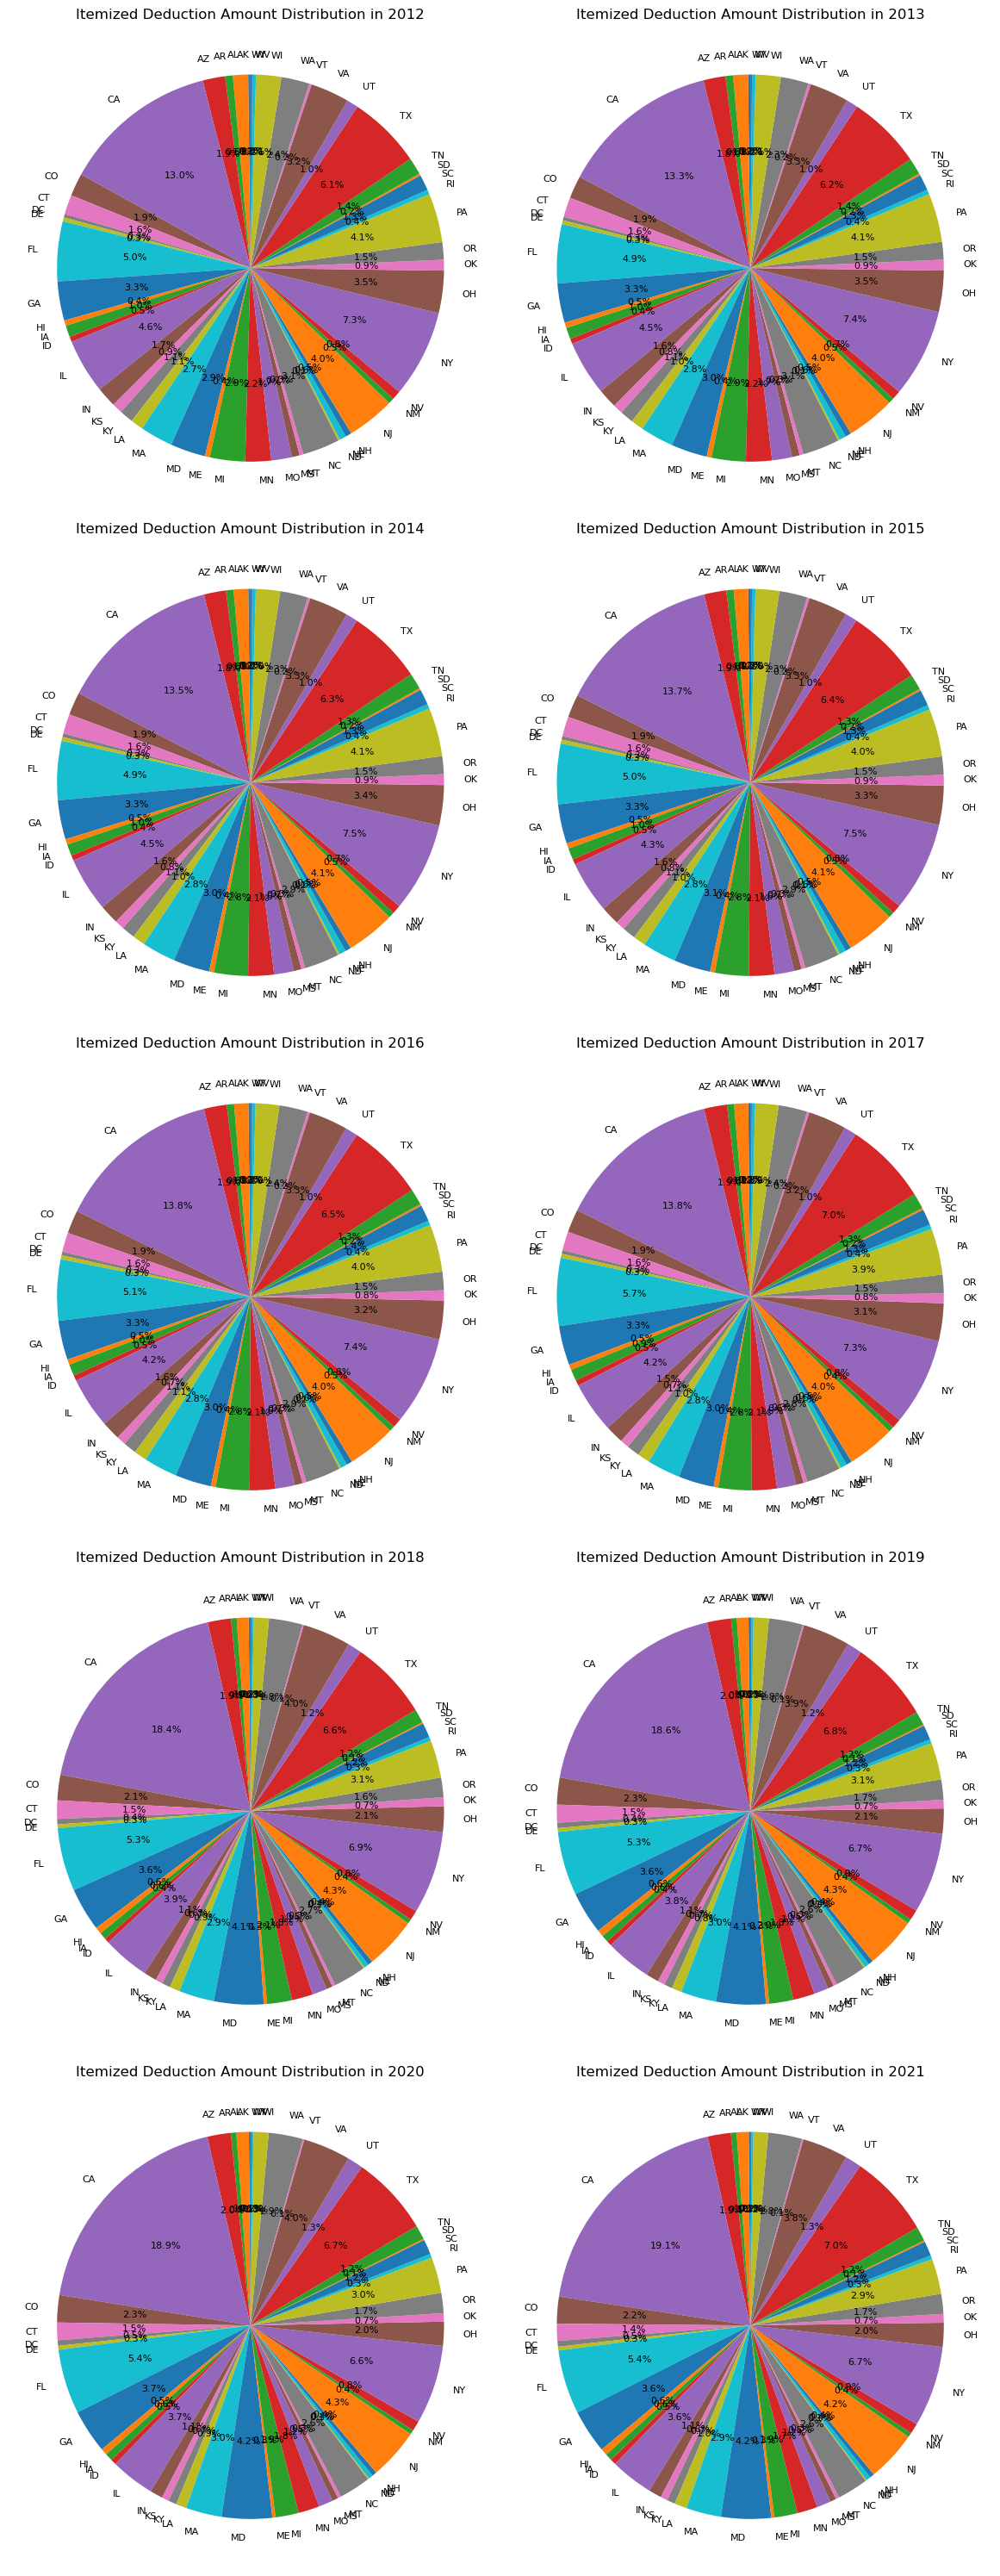

In [7]:
state_year_itemized_aggregated = filtered_data.groupby(['State', 'year']).agg({
    'Itemized_Ded_Returns': 'sum',
    'Returns': 'sum'
}).reset_index()

years = state_year_itemized_aggregated['year'].unique()

num_rows = len(years) // 2 + len(years) % 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))  
axes = axes.flatten() 

for i, year in enumerate(years):
    year_data = state_year_itemized_aggregated[state_year_itemized_aggregated['year'] == year]
    
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(year_data['Itemized_Ded_Returns'], labels=year_data['State'], autopct='%1.1f%%', startangle=90)
    
    for autotext in autotexts:
        autotext.set_size(8)  
    for text in texts:
        text.set_size(8) 
    
    ax.set_title(f'Itemized Deduction Amount Distribution in {year}', fontsize=12)

if len(years) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:

region_mapping = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'Midwest': ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA'],
    'West': ['ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM', 'AK', 'WA', 'OR', 'CA', 'HI']
}

filtered_data['Region'] = filtered_data['State'].map(lambda x: next((k for k, v in region_mapping.items() if x in v), 'Other'))

region_state_year_aggregated = filtered_data.groupby(['Region', 'State', 'year']).agg({
    'Itemized_Ded_Amt': 'sum',
    'Returns': 'sum'
}).reset_index()


unique_regions = region_state_year_aggregated['Region'].unique()
unique_years = region_state_year_aggregated['year'].unique()

for region in unique_regions:
    fig, axes = plt.subplots(nrows=len(unique_years), figsize=(10, 8 * len(unique_years)))
    axes = axes.flatten() if len(unique_years) > 1 else [axes]

    for i, year in enumerate(unique_years):
        regional_data = region_state_year_aggregated[(region_state_year_aggregated['Region'] == region) & (region_state_year_aggregated['year'] == year)]
        
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(regional_data['Itemized_Ded_Amt'], labels=regional_data['State'], autopct='%1.1f%%', startangle=90)
        
        for autotext in autotexts:
            autotext.set_size(8)

        ax.set_title(f'Itemized Deduction Amount Distribution in {region} Region, {year}')

    plt.tight_layout()
    plt.show()

In [ ]:
df['Percentage'] = (df['Std_Ded_Returns'] / df['Returns'])

grouped = df.groupby(['State', 'year']).sum()

grouped
# Plotting
#for (state, year), group in grouped.groupby(level=[0, 1]):
    # Creating a pie chart for each group
    #plt.figure(figsize=(8, 6))
    #group['Percentage'].plot(kind='pie', autopct='%1.1f%%')
    #plt.title(f'Percentage of Standard Deduction Returns in {state}, {year}')
    #plt.ylabel('')  # Removing the y-label as it's unnecessary for pie charts
    #plt.show()

    # Creating a bar chart for each group
    #plt.figure(figsize=(10, 6))
    #group['Percentage'].plot(kind='bar', color='skyblue')
    #plt.title(f'Percentage of Standard Deduction Returns by Year in {state}')
    #plt.xlabel('Year')
   # plt.ylabel('Percentage')
  #  plt.xticks(rotation=45)  # Rotating the x-axis labels for better visibility
  #  plt.show()

# Rate of Tax Returns claiming Charitable Contributions

In [ ]:
df_charitable_returns = df[['year','State', 'new_agi_stub','Returns', 'Single',
                            'Joint', 'Hd_of_Hshld', 'Charitable_Returns']]
df_charitable_returns

In [ ]:
df_charitable_returns['Rate_of_Returns_claiming_Charitable_Contribution'] = df_charitable_returns['Charitable_Returns'] / df['Returns']*100
result = df_charitable_returns.groupby(['State', 'new_agi_stub'])['Rate_of_Returns_claiming_Charitable_Contribution'].mean().reset_index()

df_charitable_returns.head(12)

In [ ]:
plt.figure(figsize=(12, 6))
for year, group in df_charitable_returns.groupby('new_agi_stub'):
#     plt.barh(group['year'], group['Rate_of_Returns_claiming_Charitable_Contribution'], label=year)
    plt.barh(group['new_agi_stub'], group['year'], label=year)
    
plt.ylabel('Income Bracket Low (1) to High (6)')
plt.xlabel('Mean Rate of Returns Claiming Charitable Contribution')
plt.title('Mean Rate of Returns Claiming Charitable Contribution by Year and Income Bracket Level')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()